# **ML Maverics**

In [160]:
## Safwan Ul Islam  2112173642
## Arka Karmoker 2112343642
## Sheikh Mushrure Zucky 1821178642
## Shahriar Hossain Shezan 2013184642

# **DATA PREPROCESSING**

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import IsolationForest

In [165]:
df = pd.read_excel('/Users/safwan/Desktop/445/RTA Data 2020 to July 2023 4.xlsx', sheet_name='Sheet1')
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Split the dataset then applying the PREPROCESSING**

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_excel('/Users/safwan/Desktop/445/RTA Data 2020 to July 2023.xlsx', sheet_name='Sheet1')

# First split: train and temporary (test + validation)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Second split: validation and test (from temporary set)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Displaying the sizes of each split
print("Training set size:", train_df.shape)
print("Validation set size:", valid_df.shape)
print("Test set size:", test_df.shape)


Training set size: (32332, 25)
Validation set size: (6928, 25)
Test set size: (6929, 25)


In [168]:
print("Training Set Info:")
train_df.info()
print("\n")

print("Validation Set Info:")
valid_df.info()
print("\n")

print("Test Set Info:")
test_df.info()


Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32332 entries, 9632 to 15795
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    32332 non-null  object        
 1   EcNumber                  27248 non-null  object        
 2   CallTime                  28171 non-null  datetime64[ns]
 3   EmergencyArea             32332 non-null  object        
 4   TotalPatientsInEmergency  32332 non-null  object        
 5   Gender                    32332 non-null  object        
 6   Age                       32332 non-null  float64       
 7   HospitalName              16962 non-null  object        
 8   Reason                    32332 non-null  object        
 9   responsetime              32329 non-null  float64       
 10  EducationTitle            32332 non-null  object        
 11  InjuryType                32331 non-null  object        
 12  C

In [172]:
# Check missing values in the training set
print("Missing values in Training Set:")
print(train_df.isnull().sum())
print("\n")

# Check missing values in the validation set
print("Missing values in Validation Set:")
print(valid_df.isnull().sum())
print("\n")

# Check missing values in the test set
print("Missing values in Test Set:")
print(test_df.isnull().sum())


Missing values in Training Set:
EcYear                          0
EcNumber                     5084
CallTime                     4161
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          0
Age                             0
HospitalName                15370
Reason                          0
responsetime                    3
EducationTitle                  0
InjuryType                      1
Cause                           1
PatientStatus                   1
BicycleInvovled                 1
BikesInvolved                   1
BusesInvolved                   1
CarsInvolved                    1
CartInvovled                    1
RickshawsInvolved               1
TractorInvovled                 1
TrainsInvovled                  1
TrucksInvolved                  1
VansInvolved                    1
OthersInvolved                  1
dtype: int64


Missing values in Validation Set:
EcYear                         0
EcNumber                    1045
Cal

In [174]:
# Define the columns to check for missing values
columns_to_check = ['EmergencyArea', 'Gender', 'Age', 'Reason', 'responsetime', 'EducationTitle', 
                    'InjuryType', 'Cause', 'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 
                    'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
                    'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

# Drop rows with missing values in the specified columns for each dataset
train_df1 = train_df.dropna(subset=columns_to_check)
valid_df1 = valid_df.dropna(subset=columns_to_check)
test_df1 = test_df.dropna(subset=columns_to_check)

# Check the resulting sizes
print("Training set size after dropping missing values:", train_df1.shape)
print("Validation set size after dropping missing values:", valid_df1.shape)
print("Test set size after dropping missing values:", test_df1.shape)


Training set size after dropping missing values: (32328, 25)
Validation set size after dropping missing values: (6927, 25)
Test set size after dropping missing values: (6927, 25)


In [176]:
# Check missing values in the training set
print("Missing values in Training Set:")
print(train_df1.isnull().sum())
print("\n")

# Check missing values in the validation set
print("Missing values in Validation Set:")
print(valid_df1.isnull().sum())
print("\n")

# Check missing values in the test set
print("Missing values in Test Set:")
print(test_df1.isnull().sum())


Missing values in Training Set:
EcYear                          0
EcNumber                     5084
CallTime                     4160
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          0
Age                             0
HospitalName                15369
Reason                          0
responsetime                    0
EducationTitle                  0
InjuryType                      0
Cause                           0
PatientStatus                   0
BicycleInvovled                 0
BikesInvolved                   0
BusesInvolved                   0
CarsInvolved                    0
CartInvovled                    0
RickshawsInvolved               0
TractorInvovled                 0
TrainsInvovled                  0
TrucksInvolved                  0
VansInvolved                    0
OthersInvolved                  0
dtype: int64


Missing values in Validation Set:
EcYear                         0
EcNumber                    1045
Cal

In [178]:

def process_call_time(df):
    # Convert 'CallTime' to datetime
    df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')
    
    # Create new columns
    df['Time'] = df['CallTime'].dt.time  # Extract time
    df['Day'] = df['CallTime'].dt.day_name()  # Extract day name
    df['Month'] = df['CallTime'].dt.month_name()  # Extract month name
    
    return df

# Process each DataFrame
train_df1 = process_call_time(train_df1)
valid_df1 = process_call_time(valid_df1)
test_df1 = process_call_time(test_df1)

# Display the updated DataFrame with new columns for each set
print("Training Set:")
print(train_df1[['Time', 'Day', 'Month']].head(), "\n")

print("Validation Set:")
print(valid_df1[['Time', 'Day', 'Month']].head(), "\n")

print("Test Set:")
print(test_df1[['Time', 'Day', 'Month']].head())


Training Set:
           Time       Day      Month
9632        NaT       NaN        NaN
1721        NaT       NaN        NaN
3305   19:56:10  Saturday  September
32702  13:08:00  Saturday        May
30845  14:34:00    Monday       July 

Validation Set:
           Time       Day    Month
18056  17:14:00  Thursday      May
5853        NaT       NaN      NaN
38670       NaT       NaN      NaN
8713   14:20:36    Friday  January
10927  13:43:39    Friday  January 

Test Set:
           Time        Day      Month
3028   08:14:45    Tuesday  September
31872  09:49:00    Tuesday        May
7478   00:11:00     Sunday      March
8777   09:04:29  Wednesday    January
26430  22:59:00     Monday   November


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3657499421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3657499421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['CallTime'].dt.time  # Extract time
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3657499421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

In [180]:
# Function to convert time to seconds
def time_to_seconds(time_obj):
    if pd.isna(time_obj):
        return None
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

# Function to process each DataFrame and add Time_in_seconds
def process_time_in_seconds(df):
    # Create a new column for time in seconds
    df['Time_in_seconds'] = df['Time'].apply(time_to_seconds)
    
    # Fill missing values with the mean of the previous and next values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(
        (df['Time_in_seconds'].shift(1) + df['Time_in_seconds'].shift(-1)) / 2
    )
    
    return df

# Process each DataFrame
train_df1 = process_time_in_seconds(train_df1)
valid_df1 = process_time_in_seconds(valid_df1)
test_df1 = process_time_in_seconds(test_df1)

# Display the updated DataFrame with the new 'Time_in_seconds' column for each set
print("Training Set with Time in Seconds:")
print(train_df1[['Time', 'Time_in_seconds']].head(), "\n")

print("Validation Set with Time in Seconds:")
print(valid_df1[['Time', 'Time_in_seconds']].head(), "\n")

print("Test Set with Time in Seconds:")
print(test_df1[['Time', 'Time_in_seconds']].head())


Training Set with Time in Seconds:
           Time  Time_in_seconds
9632        NaT              NaN
1721        NaT              NaN
3305   19:56:10          71770.0
32702  13:08:00          47280.0
30845  14:34:00          52440.0 

Validation Set with Time in Seconds:
           Time  Time_in_seconds
18056  17:14:00          62040.0
5853        NaT              NaN
38670       NaT              NaN
8713   14:20:36          51636.0
10927  13:43:39          49419.0 

Test Set with Time in Seconds:
           Time  Time_in_seconds
3028   08:14:45          29685.0
31872  09:49:00          35340.0
7478   00:11:00            660.0
8777   09:04:29          32669.0
26430  22:59:00          82740.0


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3192208316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time'].apply(time_to_seconds)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3192208316.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3192208316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

In [182]:
# Function to convert seconds back to time format
def seconds_to_time(seconds):
    if pd.isna(seconds):
        return None
    h = int(seconds // 3600)
    m = int((seconds % 3600) // 60)
    s = int(seconds % 60)
    return f"{h:02}:{m:02}:{s:02}"

# Function to process each DataFrame
def process_time_conversion(df):
    # Backward fill missing values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
    
    # Forward fill missing values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='ffill')
    
    # Create a new column for the time format
    df['TIME'] = df['Time_in_seconds'].apply(seconds_to_time)
    
    return df

# Process each DataFrame
train_df1 = process_time_conversion(train_df1)
valid_df1 = process_time_conversion(valid_df1)
test_df1 = process_time_conversion(test_df1)

# Display the updated DataFrame with the new 'TIME' column for each set
print("Training Set with TIME:")
print(train_df1[['Time_in_seconds', 'TIME']].head(), "\n")

print("Validation Set with TIME:")
print(valid_df1[['Time_in_seconds', 'TIME']].head(), "\n")

print("Test Set with TIME:")
print(test_df1[['Time_in_seconds', 'TIME']].head())


Training Set with TIME:
       Time_in_seconds      TIME
9632           71770.0  19:56:10
1721           71770.0  19:56:10
3305           71770.0  19:56:10
32702          47280.0  13:08:00
30845          52440.0  14:34:00 

Validation Set with TIME:
       Time_in_seconds      TIME
18056          62040.0  17:14:00
5853           51636.0  14:20:36
38670          51636.0  14:20:36
8713           51636.0  14:20:36
10927          49419.0  13:43:39 

Test Set with TIME:
       Time_in_seconds      TIME
3028           29685.0  08:14:45
31872          35340.0  09:49:00
7478             660.0  00:11:00
8777           32669.0  09:04:29
26430          82740.0  22:59:00


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3107983667.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3107983667.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/3107983667.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(

In [184]:
# Drop specified columns from each DataFrame
columns_to_drop = ['CallTime', 'Time_in_seconds', 'Time']

train_df1.drop(columns=columns_to_drop, inplace=True)
valid_df1.drop(columns=columns_to_drop, inplace=True)
test_df1.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrames to confirm columns have been dropped
print("Training Set after dropping columns:")
print(train_df1.head(), "\n")

print("Validation Set after dropping columns:")
print(valid_df1.head(), "\n")

print("Test Set after dropping columns:")
print(test_df1.head())


Training Set after dropping columns:
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
30845   2022   330785              imtiaz mall G t road n/r pso pump rwp   

      TotalPatientsInEmergency  Gender   Age           HospitalName  \
9632                         2    Male  22.0  HIT Wah Cantt, Taxila   
1721                         4    Male  33.0                    DHQ   
3305                         1  Female  60.0                    NaN   
32702                        1    Male   8.0                    NaN   
30845                        1    Male  32.0                    BBH   

                                               Reason  responsetime  \
9632    

/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/2762708384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1.drop(columns=columns_to_drop, inplace=True)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/2762708384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df1.drop(columns=columns_to_drop, inplace=True)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/2762708384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [28]:
# Generate summary statistics for each DataFrame
train_summary = train_df1.describe()
valid_summary = valid_df1.describe()
test_summary = test_df1.describe()

# Print the summary statistics
print("Summary Statistics for Training Set:")
print(train_summary, "\n")

print("Summary Statistics for Validation Set:")
print(valid_summary, "\n")

print("Summary Statistics for Test Set:")
print(test_summary)


Summary Statistics for Training Set:
                Age  responsetime  BicycleInvovled  BikesInvolved  \
count  32328.000000  32328.000000     32328.000000   32328.000000   
mean      32.437794      6.253870         0.008909       0.966592   
std       15.177508      4.929714         0.094295       0.579229   
min        0.000000      1.000000         0.000000       0.000000   
25%       21.000000      3.000000         0.000000       1.000000   
50%       29.000000      5.000000         0.000000       1.000000   
75%       42.000000      8.000000         0.000000       1.000000   
max      118.000000    101.000000         2.000000      10.000000   

       BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
count   32328.000000  32328.000000  32328.000000       32328.000000   
mean        0.009435      0.233884      0.002134           0.087478   
std         0.101969      0.447946      0.046151           0.289248   
min         0.000000      0.000000      0.000000         

In [30]:

from scipy import stats

# Function to identify outliers using Z-score
def identify_outliers(df):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[['Age', 'responsetime', 'BikesInvolved']].dropna()))
    
    # Identify rows with outliers
    outliers = np.where(z_scores > 3)
    outliers_indices = np.unique(outliers[0])  # Unique indices of outliers
    
    return outliers_indices

# Identify outliers in each DataFrame
train_outliers = identify_outliers(train_df1)
valid_outliers = identify_outliers(valid_df1)
test_outliers = identify_outliers(test_df1)

# Print outliers indices for each dataset
print("Outliers detected at rows in Training Set:", train_outliers)
print("Outliers detected at rows in Validation Set:", valid_outliers)
print("Outliers detected at rows in Test Set:", test_outliers)


Outliers detected at rows in Training Set: [   39   107   204   316   503   559   612   622   625   699   771   775
   778   789   799   807   816   825   881   895   909   929   963  1034
  1240  1462  1609  1656  1734  1786  1820  1828  1831  1946  1976  2027
  2087  2211  2360  2363  2413  2494  2509  2529  2610  2632  2681  2799
  2864  2985  3088  3106  3107  3138  3142  3210  3290  3311  3467  3470
  3624  3631  3684  3758  3764  3769  3811  3896  3946  4015  4054  4068
  4075  4134  4216  4377  4525  4548  4598  4622  4720  4799  4830  4937
  4975  4980  5030  5145  5269  5322  5386  5391  5448  5455  5547  5552
  5598  5711  5726  5791  5802  5821  5858  5969  6094  6134  6150  6167
  6180  6188  6220  6244  6270  6317  6361  6433  6468  6491  6519  6568
  6588  6630  6731  6741  6812  6819  6827  6956  7057  7105  7124  7199
  7267  7413  7646  7724  7742  7786  7832  7857  7879  7908  7955  7998
  8061  8216  8235  8326  8398  8524  8636  8736  8741  8781  8784  8849
  8856  

In [32]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df):
    # Calculate Q1 and Q3
    Q1 = df[['Age', 'responsetime']].quantile(0.25)
    Q3 = df[['Age', 'responsetime']].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df[['Age', 'responsetime']] < (Q1 - 1.5 * IQR)) | 
                 (df[['Age', 'responsetime']] > (Q3 + 1.5 * IQR)))
    outliers_df = df[outliers.any(axis=1)]

    return outliers_df

# Identify outliers in each DataFrame
train_outliers_iqr = identify_outliers_iqr(train_df1)
valid_outliers_iqr = identify_outliers_iqr(valid_df1)
test_outliers_iqr = identify_outliers_iqr(test_df1)

# Print outliers count and display first few rows for each dataset
print("Outliers detected using IQR in Training Set:", train_outliers_iqr.shape[0])
print(train_outliers_iqr.head(), "\n")

print("Outliers detected using IQR in Validation Set:", valid_outliers_iqr.shape[0])
print(valid_outliers_iqr.head(), "\n")

print("Outliers detected using IQR in Test Set:", test_outliers_iqr.shape[0])
print(test_outliers_iqr.head())


Outliers detected using IQR in Training Set: 1877
      EcYear EcNumber                                      EmergencyArea  \
45245   2023   360763             pehawar road lane no 05 t.w saddar rwp   
43398   2023   367749   Pakistan State Oil, Airport Road, Chaklala Sc...   
18432   2021    12331  Infront Of Punjab Housing Society Gate Adyala ...   
38293   2023      NaN   Pwd Housing Society, Islamabad Capital Territory   
38546   2023   384886         Rhc Baga Sheikhan Chakbeli Road Rawalpindi   

      TotalPatientsInEmergency  Gender   Age                 HospitalName  \
45245                        1  Female  76.0                          NaN   
43398                        1    Male  27.0                          NaN   
18432                        1  Female  23.0                          BBH   
38293                        2    Male  48.0                         PIMS   
38546                        1    Male  36.0  Wateen Hospital, Rawalpindi   

                              

In [34]:


# Function to apply Isolation Forest and identify outliers
def identify_outliers_isolation_forest(df):
    # Drop missing values from specified columns
    df_clean = df[['Age', 'responsetime']].dropna()
    
    # Apply Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_clean['Outlier'] = iso_forest.fit_predict(df_clean)
    
    # -1 indicates outliers
    outliers_iso = df_clean[df_clean['Outlier'] == -1]
    
    return outliers_iso

# Identify outliers in each DataFrame
train_outliers_iso = identify_outliers_isolation_forest(train_df1)
valid_outliers_iso = identify_outliers_isolation_forest(valid_df1)
test_outliers_iso = identify_outliers_isolation_forest(test_df1)

# Print outliers count and display first few rows for each dataset
print("Outliers detected using Isolation Forest in Training Set:", train_outliers_iso.shape[0])
print(train_outliers_iso.head(), "\n")

print("Outliers detected using Isolation Forest in Validation Set:", valid_outliers_iso.shape[0])
print(valid_outliers_iso.head(), "\n")

print("Outliers detected using Isolation Forest in Test Set:", test_outliers_iso.shape[0])
print(test_outliers_iso.head())


Outliers detected using Isolation Forest in Training Set: 1617
        Age  responsetime  Outlier
45245  76.0           3.0       -1
8285    3.0          10.0       -1
26335   4.0           2.0       -1
43398  27.0          82.0       -1
38293  48.0          20.0       -1 

Outliers detected using Isolation Forest in Validation Set: 347
        Age  responsetime  Outlier
41417  15.0          22.0       -1
10743  43.0          20.0       -1
26713  70.0          29.0       -1
39271  34.0          22.0       -1
8867    5.0           2.0       -1 

Outliers detected using Isolation Forest in Test Set: 346
        Age  responsetime  Outlier
43334  75.0           3.0       -1
9588   63.0          23.0       -1
22311  52.0          16.0       -1
42100  53.0          18.0       -1
15168  17.0          26.0       -1


In [35]:
# Function to remove outliers based on IQR method
def remove_outliers_iqr(df):
    # Calculate Q1 and Q3
    Q1 = df[['Age', 'responsetime']].quantile(0.25)
    Q3 = df[['Age', 'responsetime']].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df[['Age', 'responsetime']] < (Q1 - 1.5 * IQR)) | 
                 (df[['Age', 'responsetime']] > (Q3 + 1.5 * IQR)))

    # Remove outliers
    cleaned_df = df[~outliers.any(axis=1)]
    return cleaned_df

# Remove outliers in each DataFrame
cleaned_train_df = remove_outliers_iqr(train_df1)
cleaned_valid_df = remove_outliers_iqr(valid_df1)
cleaned_test_df = remove_outliers_iqr(test_df1)

# Print the shape of cleaned DataFrames
print("Data shape after removing outliers in Training Set:", cleaned_train_df.shape)
print("Data shape after removing outliers in Validation Set:", cleaned_valid_df.shape)
print("Data shape after removing outliers in Test Set:", cleaned_test_df.shape)


Data shape after removing outliers in Training Set: (30451, 27)
Data shape after removing outliers in Validation Set: (6518, 27)
Data shape after removing outliers in Test Set: (6483, 27)


In [38]:
# Function to detect outliers in 'BikesInvolved' using the IQR method
def detect_outliers_iqr_bikes(df):
    # Calculate Q1 and Q3
    Q1 = df['BikesInvolved'].quantile(0.25)
    Q3 = df['BikesInvolved'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['BikesInvolved'] < lower_bound) | (df['BikesInvolved'] > upper_bound)]

    return outliers

# Detect outliers in each cleaned DataFrame
train_outliers_bikes = detect_outliers_iqr_bikes(cleaned_train_df)
valid_outliers_bikes = detect_outliers_iqr_bikes(cleaned_valid_df)
test_outliers_bikes = detect_outliers_iqr_bikes(cleaned_test_df)

# Print outliers count for each dataset
print("Outliers detected using IQR in Training Set for 'BikesInvolved':", train_outliers_bikes.shape[0])
print(train_outliers_bikes.head(), "\n")

print("Outliers detected using IQR in Validation Set for 'BikesInvolved':", valid_outliers_bikes.shape[0])
print(valid_outliers_bikes.head(), "\n")

print("Outliers detected using IQR in Test Set for 'BikesInvolved':", test_outliers_bikes.shape[0])
print(test_outliers_bikes.head())


Outliers detected using IQR in Training Set for 'BikesInvolved': 9915
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
24776   2022   354261             Matuha Village,Bhadana Road,Gujar Khan   

      TotalPatientsInEmergency  Gender   Age                HospitalName  \
9632                         2    Male  22.0       HIT Wah Cantt, Taxila   
1721                         4    Male  33.0                         DHQ   
3305                         1  Female  60.0                         NaN   
32702                        1    Male   8.0                         NaN   
24776                        3    Male  30.0  THQ,Gujar Khan, Rawalpindi   

                

In [40]:
# Function to handle outliers in 'BikesInvolved' using the IQR method
def handle_outliers_bikes(df):
    # Calculate Q1 and Q3
    Q1 = df['BikesInvolved'].quantile(0.25)
    Q3 = df['BikesInvolved'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds
    df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)

    # Calculate median
    median_value = df['BikesInvolved'].median()

    # Replace remaining outliers with median
    df.loc[(df['BikesInvolved'] < lower_bound) | (df['BikesInvolved'] > upper_bound), 'BikesInvolved'] = median_value

    return df

# Handle outliers in each cleaned DataFrame
cleaned_train_df = handle_outliers_bikes(cleaned_train_df)
cleaned_valid_df = handle_outliers_bikes(cleaned_valid_df)
cleaned_test_df = handle_outliers_bikes(cleaned_test_df)

# Print the first few rows of each DataFrame after handling outliers
print("Training Set after handling outliers in 'BikesInvolved':")
print(cleaned_train_df[['BikesInvolved']].head(), "\n")

print("Validation Set after handling outliers in 'BikesInvolved':")
print(cleaned_valid_df[['BikesInvolved']].head(), "\n")

print("Test Set after handling outliers in 'BikesInvolved':")
print(cleaned_test_df[['BikesInvolved']].head())


Training Set after handling outliers in 'BikesInvolved':
       BikesInvolved
9632             1.0
1721             1.0
3305             1.0
32702            1.0
30845            1.0 

Validation Set after handling outliers in 'BikesInvolved':
       BikesInvolved
18056            1.0
5853             1.0
38670            1.0
8713             1.0
10927            1.0 

Test Set after handling outliers in 'BikesInvolved':
       BikesInvolved
3028             1.0
31872            1.0
7478             1.0
8777             1.0
26430            1.0


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/1118517347.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/1118517347.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_16474/1118517347.py:13: S

In [42]:
# Function to count unique values for specified columns
def count_unique_values(df):
    unique_counts = df[['Gender', 'Age', 
                        'EducationTitle', 
                        'InjuryType', 'Cause', 'PatientStatus', 
                        'Day', 'Month']].nunique()
    return unique_counts

# Count unique values for each cleaned DataFrame
unique_counts_train = count_unique_values(cleaned_train_df)
unique_counts_valid = count_unique_values(cleaned_valid_df)
unique_counts_test = count_unique_values(cleaned_test_df)

# Print unique counts for each dataset
print("Unique counts in the Training Set:")
print(unique_counts_train, "\n")

print("Unique counts in the Validation Set:")
print(unique_counts_valid, "\n")

print("Unique counts in the Test Set:")
print(unique_counts_test)


Unique counts in the Training Set:
Gender             3
Age               74
EducationTitle     8
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64 

Unique counts in the Validation Set:
Gender             2
Age               73
EducationTitle     7
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64 

Unique counts in the Test Set:
Gender             2
Age               72
EducationTitle     8
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64


In [44]:
# Function to one-hot encode specified categorical columns
def one_hot_encode(df):
    categorical_columns = ['Gender',   'Cause',  'EducationTitle', 'Day', 'Month']
    encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
    return encoded_df

# One-hot encode each cleaned DataFrame
encoded_train_df = one_hot_encode(cleaned_train_df)
encoded_valid_df = one_hot_encode(cleaned_valid_df)
encoded_test_df = one_hot_encode(cleaned_test_df)

# Print the encoded DataFrames
print("Encoded Training Set:")
print(encoded_train_df.head(), "\n")

print("Encoded Validation Set:")
print(encoded_valid_df.head(), "\n")

print("Encoded Test Set:")
print(encoded_test_df.head())


Encoded Training Set:
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
30845   2022   330785              imtiaz mall G t road n/r pso pump rwp   

      TotalPatientsInEmergency   Age           HospitalName  \
9632                         2  22.0  HIT Wah Cantt, Taxila   
1721                         4  33.0                    DHQ   
3305                         1  60.0                    NaN   
32702                        1   8.0                    NaN   
30845                        1  32.0                    BBH   

                                               Reason  responsetime  \
9632                            Vehicle fall in Ditch           1.0   


In [46]:

# Function to describe DataFrame
def describe_dataframe(df):
    return df.describe()

# Describe each encoded DataFrame
description_train = describe_dataframe(encoded_train_df)
description_valid = describe_dataframe(encoded_valid_df)
description_test = describe_dataframe(encoded_test_df)

# Print descriptions for each dataset
print("Descriptive Statistics for Encoded Training Set:")
print(description_train, "\n")

print("Descriptive Statistics for Encoded Validation Set:")
print(description_valid, "\n")

print("Descriptive Statistics for Encoded Test Set:")
print(description_test)


Descriptive Statistics for Encoded Training Set:
                Age  responsetime  BicycleInvovled  BikesInvolved  \
count  30451.000000  30451.000000     30451.000000        30451.0   
mean      31.972185      5.487836         0.008965            1.0   
std       14.490977      3.181341         0.094609            0.0   
min        0.000000      1.000000         0.000000            1.0   
25%       21.000000      3.000000         0.000000            1.0   
50%       29.000000      5.000000         0.000000            1.0   
75%       41.000000      7.000000         0.000000            1.0   
max       73.000000     15.000000         2.000000            1.0   

       BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
count   30451.000000  30451.000000  30451.000000       30451.000000   
mean        0.008834      0.234869      0.002167           0.087912   
std         0.098365      0.448688      0.046506           0.290046   
min         0.000000      0.000000      0.000

In [48]:


# Columns to standardize
columns_to_standardize = ['Age', 'TotalPatientsInEmergency', 'responsetime']

# Function to standardize selected columns in a DataFrame
def standardize_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Standardize each encoded DataFrame
standardized_train_df = standardize_columns(encoded_train_df, columns_to_standardize)
standardized_valid_df = standardize_columns(encoded_valid_df, columns_to_standardize)
standardized_test_df = standardize_columns(encoded_test_df, columns_to_standardize)

# Print the descriptive statistics for the standardized columns in each dataset
print("Descriptive Statistics for Standardized Training Set:")
print(standardized_train_df[columns_to_standardize].describe(), "\n")

print("Descriptive Statistics for Standardized Validation Set:")
print(standardized_valid_df[columns_to_standardize].describe(), "\n")

print("Descriptive Statistics for Standardized Test Set:")
print(standardized_test_df[columns_to_standardize].describe())


Descriptive Statistics for Standardized Training Set:
                Age  TotalPatientsInEmergency  responsetime
count  3.045100e+04              3.045100e+04  3.045100e+04
mean  -2.403399e-17              1.120031e-16 -7.151862e-17
std    1.000016e+00              1.000016e+00  1.000016e+00
min   -2.206387e+00             -3.732634e-01 -1.410697e+00
25%   -7.571860e-01             -3.732634e-01 -7.820215e-01
50%   -2.051093e-01             -3.732634e-01 -1.533455e-01
75%    6.230058e-01             -3.732634e-01  4.753306e-01
max    2.831313e+00              1.582126e+01  2.990035e+00 

Descriptive Statistics for Standardized Validation Set:
                Age  TotalPatientsInEmergency  responsetime
count  6.518000e+03              6.518000e+03  6.518000e+03
mean  -2.234754e-16              1.417161e-17 -1.934970e-17
std    1.000077e+00              1.000077e+00  1.000077e+00
min   -2.123595e+00             -3.569339e-01 -1.407947e+00
25%   -7.574282e-01             -3.569339e-01 -7

In [50]:

print(standardized_test_df.columns)


Index(['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency',
       'Age', 'HospitalName', 'Reason', 'responsetime', 'InjuryType',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'TIME', 'Gender_Female', 'Gender_Male', 'Cause_Carelessness',
       'Cause_One Wheeling', 'Cause_Others', 'Cause_Over Speed',
       'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn',
       'EducationTitle_Graduation', 'EducationTitle_Illetrate',
       'EducationTitle_Intermediate', 'EducationTitle_Masters',
       'EducationTitle_Matric', 'EducationTitle_Middle', 'EducationTitle_PHD',
       'EducationTitle_Primary', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',

In [52]:
print(standardized_train_df.isnull().sum())
print(standardized_valid_df.isnull().sum())
print(standardized_test_df.isnull().sum())

EcYear                             0
EcNumber                        4591
EmergencyArea                      0
TotalPatientsInEmergency           0
Age                                0
HospitalName                   14930
Reason                             0
responsetime                       0
InjuryType                         0
PatientStatus                      0
BicycleInvovled                    0
BikesInvolved                      0
BusesInvolved                      0
CarsInvolved                       0
CartInvovled                       0
RickshawsInvolved                  0
TractorInvovled                    0
TrainsInvovled                     0
TrucksInvolved                     0
VansInvolved                       0
OthersInvolved                     0
TIME                               0
Gender_Female                      0
Gender_Male                        0
Gender_Other                       0
Cause_Carelessness                 0
Cause_One Wheeling                 0
C

# Training the following models on the train set for InjuryType
# Decision Tree
# Random Forest
# XGBoost
# Support Vector Machine (SVM)**

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming standardized_train_df, standardized_valid_df, standardized_test_df are already loaded

# Define the features you want to use for the model
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 
            'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'InjuryType' into numeric values
standardized_train_df['InjuryType'] = label_encoder.fit_transform(standardized_train_df['InjuryType'])
standardized_valid_df['InjuryType'] = label_encoder.transform(standardized_valid_df['InjuryType'])
standardized_test_df['InjuryType'] = label_encoder.transform(standardized_test_df['InjuryType'])

# Separate features and target variable for training, validation, and testing
X_train = standardized_train_df[features]
y_train = standardized_train_df['InjuryType']
X_valid = standardized_valid_df[features]
y_valid = standardized_valid_df['InjuryType']
X_test = standardized_test_df[features]
y_test = standardized_test_df['InjuryType']




# 2. Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for Decision Tree using GridSearchCV
dt_param_grid = {'max_depth': [4, 5, 6, 7, 8, 9]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best Decision Tree Model
best_dt_model = dt_grid_search.best_estimator_
print(f"Best Decision Tree Max Depth: {dt_grid_search.best_params_['max_depth']}")
dt_preds = best_dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_preds)}")

# 3. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {'n_estimators': [10, 50, 100, 200]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest N Estimators: {rf_grid_search.best_params_['n_estimators']}")
rf_preds = best_rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds)}")

# 4. XGBoost Model
xgb_model = XGBClassifier(random_state=42)

# Hyperparameter tuning for XGBoost using GridSearchCV
xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_model = xgb_grid_search.best_estimator_
print(f"Best XGBoost Learning Rate: {xgb_grid_search.best_params_['learning_rate']}")
xgb_preds = best_xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds)}")

# 5. Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)

# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best SVM Model
best_svm_model = svm_grid_search.best_estimator_
print(f"Best SVM Kernel: {svm_grid_search.best_params_['kernel']}")
svm_preds = best_svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_preds)}")


Best Decision Tree Max Depth: 4
Decision Tree Accuracy: 0.7655406447632269
Best Random Forest N Estimators: 200
Random Forest Accuracy: 0.7269782508098103
Best XGBoost Learning Rate: 0.01
XGBoost Accuracy: 0.7650778960357859
Best SVM Kernel: linear
SVM Accuracy: 0.7656948943390406


# Evaluating the performance of the trained models on the test set 
# Accuracy
# Precision
# F1 Score
# Recall
# Confusion Matrix

--- Decision Tree ---
Accuracy: 0.7655406447632269
Precision: 0.5998404206333778
Recall: 0.7655406447632269
F1 Score: 0.6643223697618271

Confusion Matrix:
[[   1  435    0    1    0]
 [   0 4962    0    0    0]
 [   4  107    0    0    0]
 [   0  912    0    0    0]
 [   0   61    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.00      0.00       437
           1       0.77      1.00      0.87      4962
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       912
           4       0.00      0.00      0.00        61

    accuracy                           0.77      6483
   macro avg       0.19      0.20      0.17      6483
weighted avg       0.60      0.77      0.66      6483



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


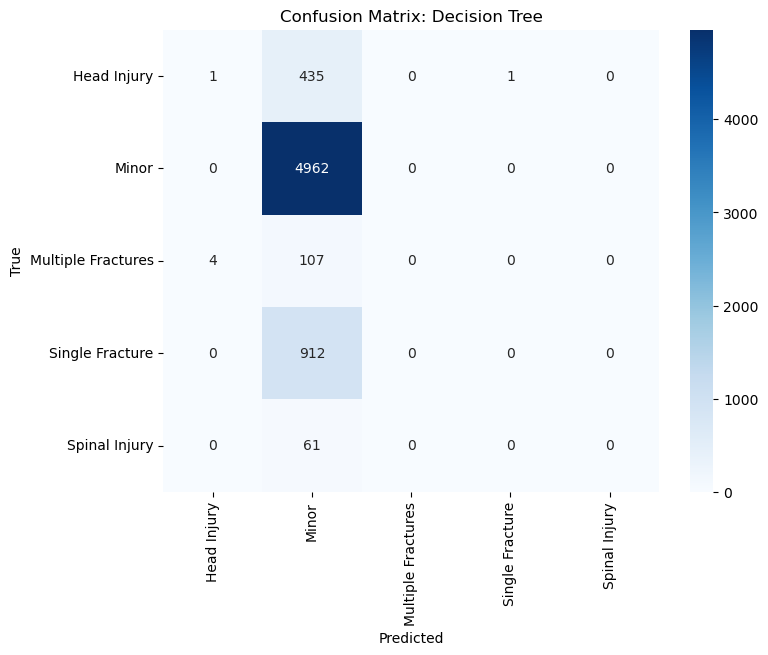

--- Random Forest ---
Accuracy: 0.7269782508098103
Precision: 0.6240609165986876
Recall: 0.7269782508098103
F1 Score: 0.6640038563051629

Confusion Matrix:
[[  17  386    6   27    1]
 [  88 4646   20  203    5]
 [   8   93    0   10    0]
 [  23  829    4   50    6]
 [   3   53    0    5    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.04      0.06       437
           1       0.77      0.94      0.85      4962
           2       0.00      0.00      0.00       111
           3       0.17      0.05      0.08       912
           4       0.00      0.00      0.00        61

    accuracy                           0.73      6483
   macro avg       0.21      0.21      0.20      6483
weighted avg       0.62      0.73      0.66      6483



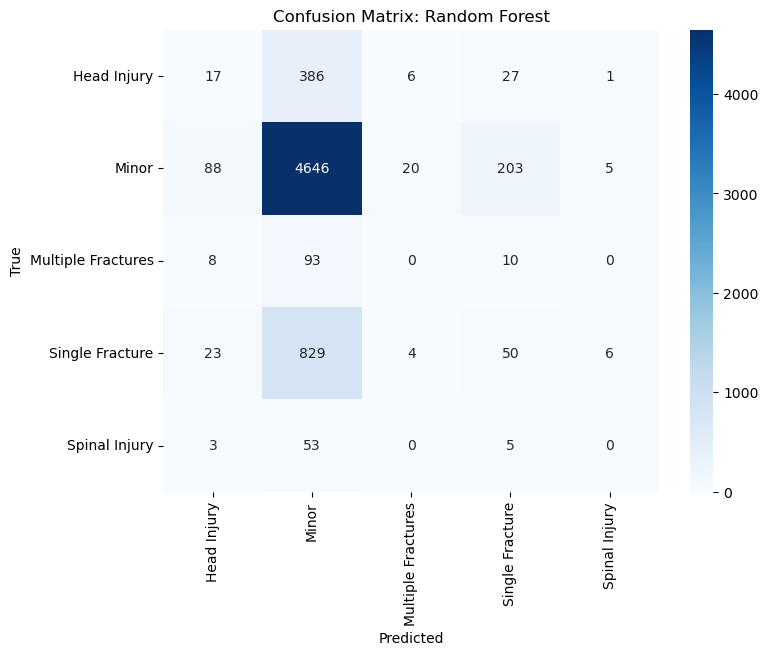

--- XGBoost ---
Accuracy: 0.7650778960357859
Precision: 0.6563840293595037
Recall: 0.7650778960357859
F1 Score: 0.6649587368545552

Confusion Matrix:
[[   1  436    0    0    0]
 [   2 4956    0    4    0]
 [   4  107    0    0    0]
 [   0  908    1    3    0]
 [   0   61    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.00      0.00       437
           1       0.77      1.00      0.87      4962
           2       0.00      0.00      0.00       111
           3       0.43      0.00      0.01       912
           4       0.00      0.00      0.00        61

    accuracy                           0.77      6483
   macro avg       0.27      0.20      0.18      6483
weighted avg       0.66      0.77      0.66      6483



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


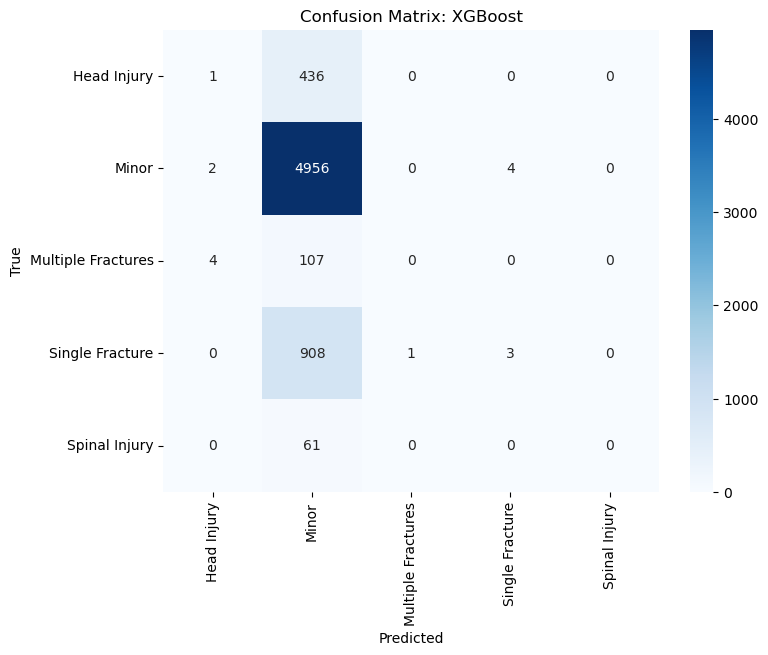

--- Support Vector Machine ---
Accuracy: 0.7656948943390406
Precision: 0.6088280292507874
Recall: 0.7656948943390406
F1 Score: 0.6646260020867006

Confusion Matrix:
[[   2  435    0    0    0]
 [   0 4962    0    0    0]
 [   4  107    0    0    0]
 [   0  912    0    0    0]
 [   0   61    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       437
           1       0.77      1.00      0.87      4962
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       912
           4       0.00      0.00      0.00        61

    accuracy                           0.77      6483
   macro avg       0.22      0.20      0.18      6483
weighted avg       0.61      0.77      0.66      6483



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


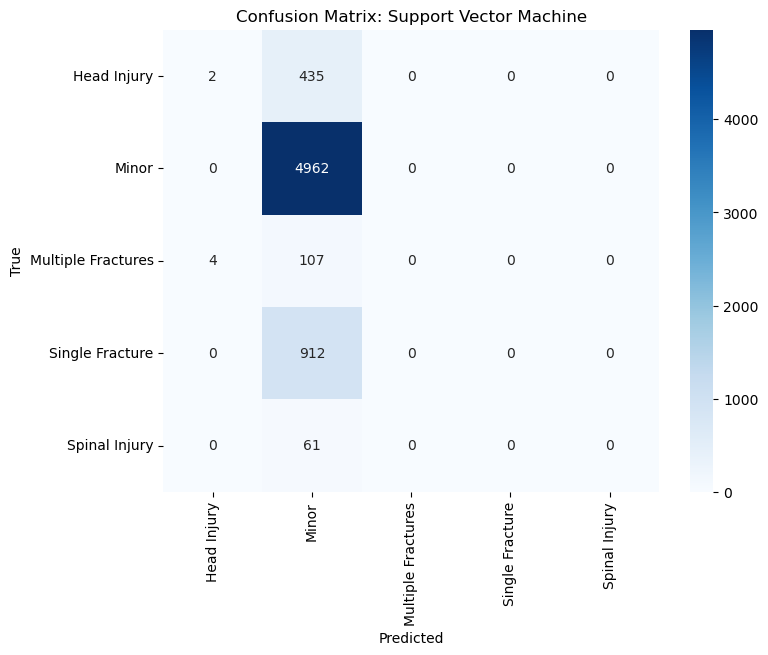

In [57]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print out the results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()



# 2. Decision Tree Model Evaluation
evaluate_model(best_dt_model, X_test, y_test, "Decision Tree")

# 3. Random Forest Model Evaluation
evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

# 4. XGBoost Model Evaluation
evaluate_model(best_xgb_model, X_test, y_test, "XGBoost")

# 5. Support Vector Machine (SVM) Model Evaluation
evaluate_model(best_svm_model, X_test, y_test, "Support Vector Machine")


# Phase 2 Logistic regression 

Accuracy: 0.7656948943390406
Precision: 0.6118807554507018
Recall: 0.7656948943390406
F1 Score: 0.6650246278204286


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


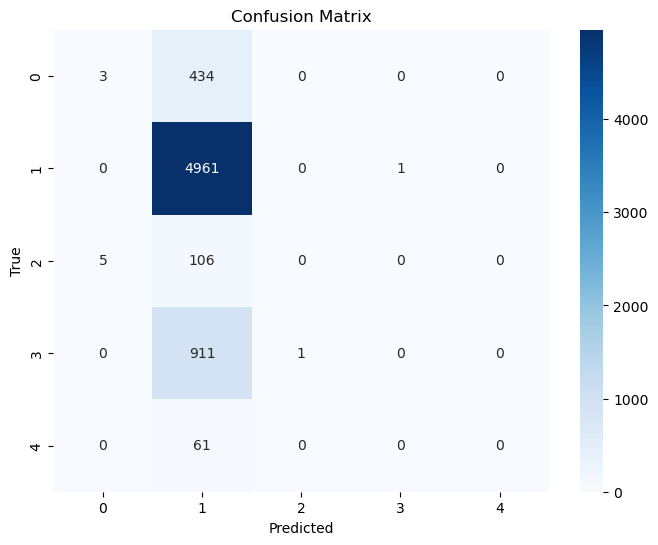

In [59]:

from sklearn.linear_model import LogisticRegression




# Define the features and target variable
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 
            'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn']

# Encode the target variable 'InjuryType' into numeric values 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
standardized_train_df['InjuryType'] = label_encoder.fit_transform(standardized_train_df['InjuryType'])
standardized_valid_df['InjuryType'] = label_encoder.transform(standardized_valid_df['InjuryType'])
standardized_test_df['InjuryType'] = label_encoder.transform(standardized_test_df['InjuryType'])

# Separate features and target variable for training, validation, and testing
X_train = standardized_train_df[features]
y_train = standardized_train_df['InjuryType']
X_valid = standardized_valid_df[features]
y_valid = standardized_valid_df['InjuryType']
X_test = standardized_test_df[features]
y_test = standardized_test_df['InjuryType']

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Comparison table

In [64]:


# Model performance data
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [0.7657, 0.7655, 0.7270, 0.7651],
    "Precision": [0.6119, 0.5998, 0.6241, 0.6564],
    "Recall": [0.7657, 0.7655, 0.7270, 0.7651],
    "F1 Score": [0.6650, 0.6643, 0.6640, 0.6650],
}

# Create a DataFrame
performance_df = pd.DataFrame(data)

# Display the table
print(performance_df)


performance_df.to_csv("model_performance_comparison.csv", index=False)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7657     0.6119  0.7657    0.6650
1        Decision Tree    0.7655     0.5998  0.7655    0.6643
2        Random Forest    0.7270     0.6241  0.7270    0.6640
3              XGBoost    0.7651     0.6564  0.7651    0.6650


# Decision Tree: Accuracy (y-axis) VS Max_depth (x-axis)
# SVM: Accuracy (y-axis) VS Kernel (x-axis)
# Random Forest: Accuracy (y-axis) VS N_estimators (x-axis)
# XGBoost: Accuracy (y-axis) VS Learning_rate (x-axis)


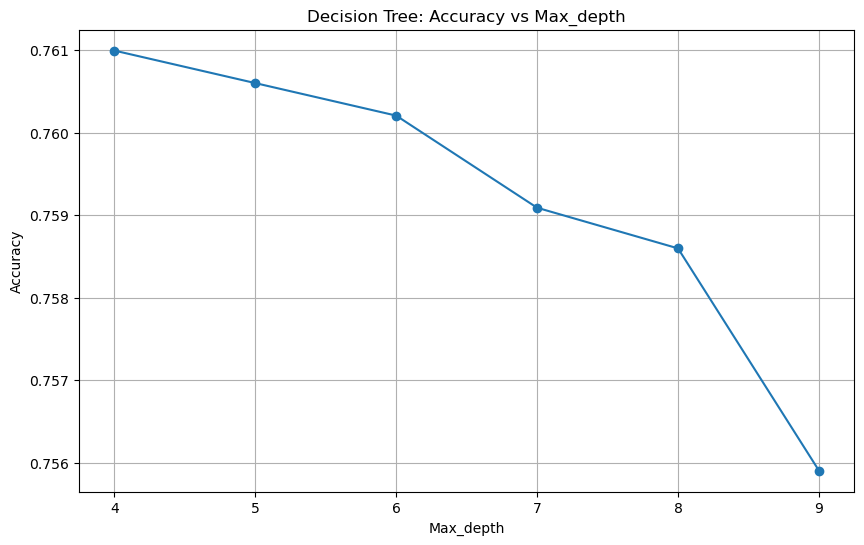

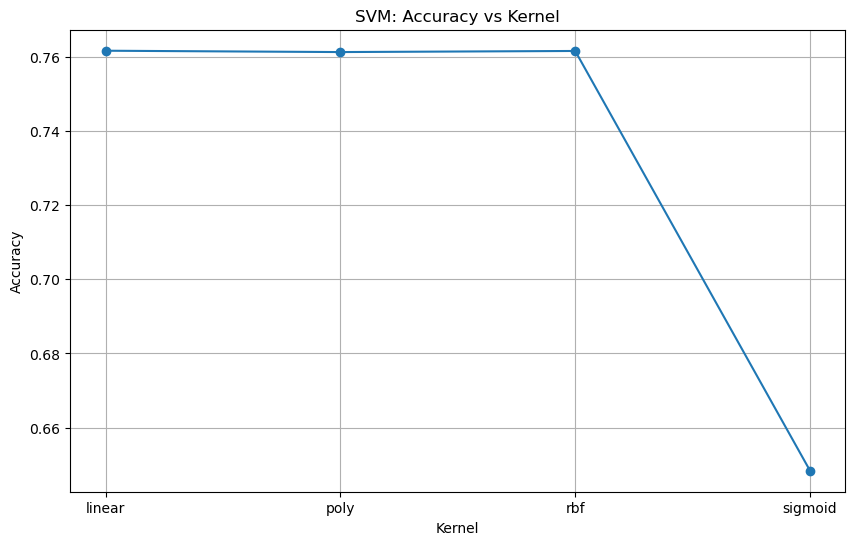

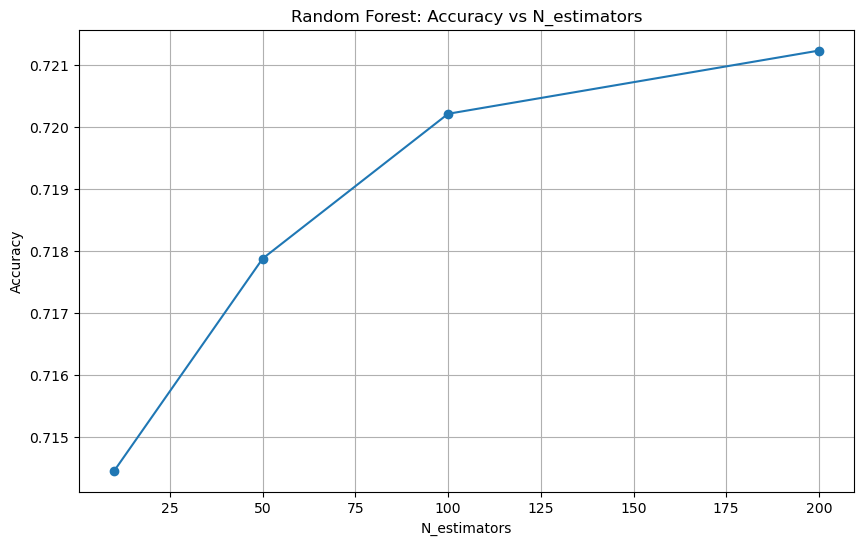

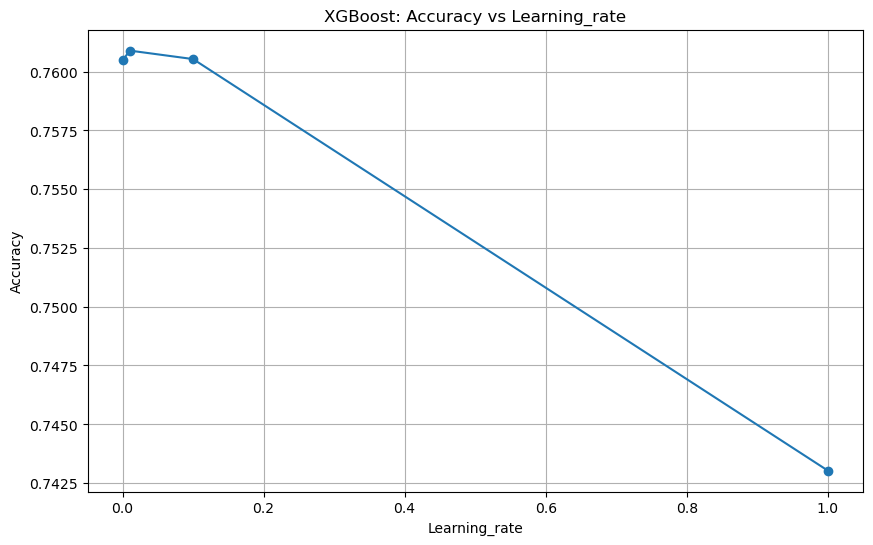

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance on Test Set:
Decision Tree - Accuracy: 0.7655406447632269 Precision: 0.5998404206333778 Recall: 0.7655406447632269 F1 Score: 0.6643223697618271
SVM - Accuracy: 0.7656948943390406 Precision: 0.6088280292507874 Recall: 0.7656948943390406 F1 Score: 0.6646260020867006
Random Forest - Accuracy: 0.7269782508098103 Precision: 0.6240609165986876 Recall: 0.7269782508098103 F1 Score: 0.6640038563051629
XGBoost - Accuracy: 0.7650778960357859 Precision: 0.6563840293595037 Recall: 0.7650778960357859 F1 Score: 0.6649587368545552
Confusion Matrix for Decision Tree:
 [[   1  435    0    1    0]
 [   0 4962    0    0    0]
 [   4  107    0    0    0]
 [   0  912    0    0    0]
 [   0   61    0    0    0]]
Confusion Matrix for SVM:
 [[   2  435    0    0    0]
 [   0 4962    0    0    0]
 [   4  107    0    0    0]
 [   0  912    0    0    0]
 [   0   61    0    0    0]]
Confusion Matrix for Random Forest:
 [[  17  386    6   27    1]
 [  88 4646   20  203    5]
 [   8   93    0   10    0]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:

# Define the features and target
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn']
target = 'InjuryType'  

# Assuming standardized_train_df, standardized_valid_df, standardized_test_df are already loaded
X_train = standardized_train_df[features]
y_train = standardized_train_df[target]
X_valid = standardized_valid_df[features]
y_valid = standardized_valid_df[target]
X_test = standardized_test_df[features]
y_test = standardized_test_df[target]

# Decision Tree: Accuracy vs Max_depth
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {'max_depth': [4, 5, 6, 7, 8, 9]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

# Plotting Decision Tree: Accuracy vs Max_depth
dt_accuracies = dt_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(dt_param_grid['max_depth'], dt_accuracies, marker='o')
plt.title('Decision Tree: Accuracy vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# SVM: Accuracy vs Kernel
svm_model = SVC(random_state=42)
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Plotting SVM: Accuracy vs Kernel
svm_accuracies = svm_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(svm_param_grid['kernel'], svm_accuracies, marker='o')
plt.title('SVM: Accuracy vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Random Forest: Accuracy vs N_estimators
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [10, 50, 100, 200]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Plotting Random Forest: Accuracy vs N_estimators
rf_accuracies = rf_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(rf_param_grid['n_estimators'], rf_accuracies, marker='o')
plt.title('Random Forest: Accuracy vs N_estimators')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# XGBoost: Accuracy vs Learning_rate
xgb_model = XGBClassifier(random_state=42)
xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Plotting XGBoost: Accuracy vs Learning_rate
xgb_accuracies = xgb_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(xgb_param_grid['learning_rate'], xgb_accuracies, marker='o')
plt.title('XGBoost: Accuracy vs Learning_rate')
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



# Decision Tree
dt_best_model = dt_grid_search.best_estimator_
dt_test_pred = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred, average='weighted')
dt_recall = recall_score(y_test, dt_test_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_test_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_test_pred)

# SVM
svm_best_model = svm_grid_search.best_estimator_
svm_test_pred = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_test_pred)
svm_precision = precision_score(y_test, svm_test_pred, average='weighted')
svm_recall = recall_score(y_test, svm_test_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_test_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_test_pred)

# Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_test_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='weighted')
rf_recall = recall_score(y_test, rf_test_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_test_pred)

# XGBoost
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_pred = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_precision = precision_score(y_test, xgb_test_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_test_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_test_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_test_pred)

# Print the evaluation results for each model
print("Performance on Test Set:")
print("Decision Tree - Accuracy:", dt_accuracy, "Precision:", dt_precision, "Recall:", dt_recall, "F1 Score:", dt_f1)
print("SVM - Accuracy:", svm_accuracy, "Precision:", svm_precision, "Recall:", svm_recall, "F1 Score:", svm_f1)
print("Random Forest - Accuracy:", rf_accuracy, "Precision:", rf_precision, "Recall:", rf_recall, "F1 Score:", rf_f1)
print("XGBoost - Accuracy:", xgb_accuracy, "Precision:", xgb_precision, "Recall:", xgb_recall, "F1 Score:", xgb_f1)

print("Confusion Matrix for Decision Tree:\n", dt_conf_matrix)
print("Confusion Matrix for SVM:\n", svm_conf_matrix)
print("Confusion Matrix for Random Forest:\n", rf_conf_matrix)
print("Confusion Matrix for XGBoost:\n", xgb_conf_matrix)


In [68]:
print(standardized_train_df.columns)

Index(['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency',
       'Age', 'HospitalName', 'Reason', 'responsetime', 'InjuryType',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'TIME', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others',
       'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn',
       'Cause_Wrong Turn', 'EducationTitle_Graduation',
       'EducationTitle_Illetrate', 'EducationTitle_Intermediate',
       'EducationTitle_Masters', 'EducationTitle_Matric',
       'EducationTitle_Middle', 'EducationTitle_PHD', 'EducationTitle_Primary',
       'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Month_April',
       'Month_August', 'Month_Decem

In [71]:

sstandardized_train_df=standardized_train_df
sstandardized_valid_df=standardized_valid_df
sstandardized_test_df=standardized_test_df

# Initialize LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Encode 'InjuryType' column into numeric labels
sstandardized_train_df['InjuryType'] = label_encoder.fit_transform(standardized_train_df['InjuryType'])
sstandardized_valid_df['InjuryType'] = label_encoder.transform(standardized_valid_df['InjuryType'])
sstandardized_test_df['InjuryType'] = label_encoder.transform(standardized_test_df['InjuryType'])

# Standardize the 'InjuryType' column
sstandardized_train_df['InjuryType'] = scaler.fit_transform(standardized_train_df[['InjuryType']])
sstandardized_valid_df['InjuryType'] = scaler.transform(standardized_valid_df[['InjuryType']])
sstandardized_test_df['InjuryType'] = scaler.transform(standardized_test_df[['InjuryType']])

print("Standardized Train DataFrame:\n", sstandardized_train_df.head())
print("\nStandardized Validation DataFrame:\n", sstandardized_valid_df.head())
print("\nStandardized Test DataFrame:\n", sstandardized_test_df.head())

Standardized Train DataFrame:
       EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
30845   2022   330785              imtiaz mall G t road n/r pso pump rwp   

       TotalPatientsInEmergency       Age           HospitalName  \
9632                   0.783488 -0.688176  HIT Wah Cantt, Taxila   
1721                   3.096992  0.070929                    DHQ   
3305                  -0.373263  1.934188                    NaN   
32702                 -0.373263 -1.654311                    NaN   
30845                 -0.373263  0.001920                    BBH   

                                               Reason  responsetime  \
9632                            

# Model train and test with plotting for PatientStatus

In [74]:




# Define features and target
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 
            'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn','InjuryType']

target = 'PatientStatus'

# Initialize LabelEncoder to encode the target variable
label_encoder = LabelEncoder()

# Encode the target variable in train, validation, and test data
sstandardized_train_df[target] = label_encoder.fit_transform(sstandardized_train_df[target])
sstandardized_valid_df[target] = label_encoder.transform(sstandardized_valid_df[target])
sstandardized_test_df[target] = label_encoder.transform(sstandardized_test_df[target])

# Separate features and target for training, validation, and testing
X_train = sstandardized_train_df[features]
y_train = sstandardized_train_df[target]
X_valid = sstandardized_valid_df[features]
y_valid = sstandardized_valid_df[target]
X_test = sstandardized_test_df[features]
y_test = sstandardized_test_df[target]

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for Decision Tree using GridSearchCV
dt_param_grid = {'max_depth': [4, 5, 6, 7, 8, 9]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best Decision Tree Model
best_dt_model = dt_grid_search.best_estimator_
print(f"Best Decision Tree Max Depth: {dt_grid_search.best_params_['max_depth']}")
dt_preds = best_dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_preds)}")

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {'n_estimators': [10, 50, 100, 200]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest N Estimators: {rf_grid_search.best_params_['n_estimators']}")
rf_preds = best_rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds)}")

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)

# Hyperparameter tuning for XGBoost using GridSearchCV
xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_model = xgb_grid_search.best_estimator_
print(f"Best XGBoost Learning Rate: {xgb_grid_search.best_params_['learning_rate']}")
xgb_preds = best_xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds)}")

# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)

# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best SVM Model
best_svm_model = svm_grid_search.best_estimator_
print(f"Best SVM Kernel: {svm_grid_search.best_params_['kernel']}")
svm_preds = best_svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_preds)}")



Best Decision Tree Max Depth: 7
Decision Tree Accuracy: 0.696128335647077
Best Random Forest N Estimators: 200
Random Forest Accuracy: 0.6742248958815363
Best XGBoost Learning Rate: 0.1
XGBoost Accuracy: 0.694740089464754
Best SVM Kernel: rbf
SVM Accuracy: 0.6959740860712633


Performance of Decision Tree Model:
Accuracy: 0.6961
Precision: 0.7140
Recall: 0.6961
F1 Score: 0.6889
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      3178
           1       0.78      0.55      0.64      3235
           2       0.67      0.41      0.51        70

    accuracy                           0.70      6483
   macro avg       0.70      0.61      0.63      6483
weighted avg       0.71      0.70      0.69      6483



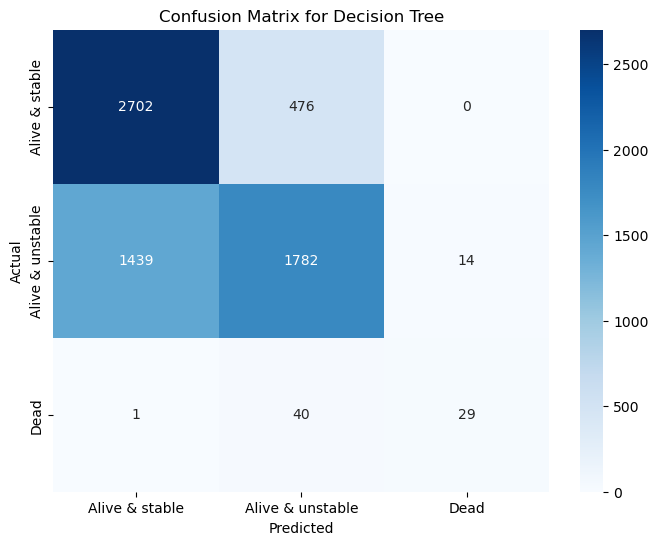

Performance of Random Forest Model:
Accuracy: 0.6742
Precision: 0.6761
Recall: 0.6742
F1 Score: 0.6718
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      3178
           1       0.70      0.61      0.65      3235
           2       0.51      0.26      0.34        70

    accuracy                           0.67      6483
   macro avg       0.62      0.54      0.56      6483
weighted avg       0.68      0.67      0.67      6483



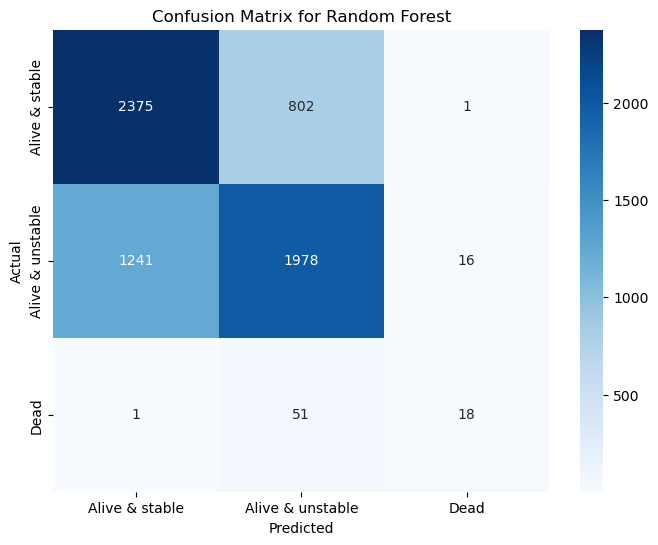

Performance of XGBoost Model:
Accuracy: 0.6947
Precision: 0.7132
Recall: 0.6947
F1 Score: 0.6863
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      3178
           1       0.78      0.54      0.64      3235
           2       0.58      0.27      0.37        70

    accuracy                           0.69      6483
   macro avg       0.67      0.56      0.58      6483
weighted avg       0.71      0.69      0.69      6483



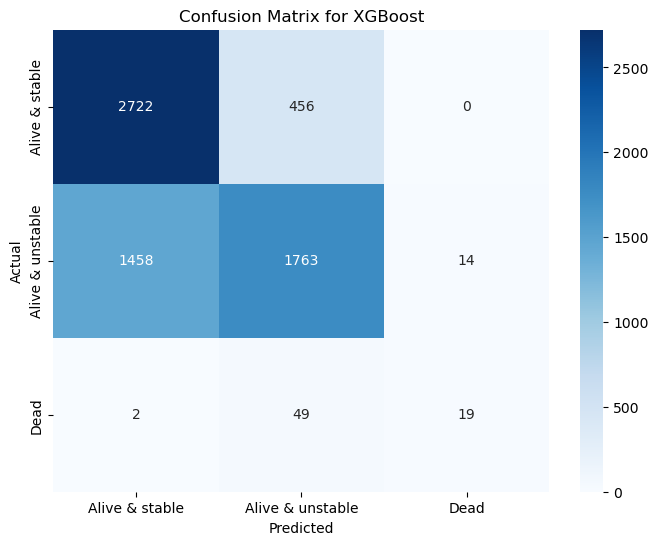

Performance of SVM Model:
Accuracy: 0.6960
Precision: 0.7171
Recall: 0.6960
F1 Score: 0.6853
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      3178
           1       0.79      0.54      0.64      3235
           2       0.62      0.11      0.19        70

    accuracy                           0.70      6483
   macro avg       0.68      0.51      0.53      6483
weighted avg       0.72      0.70      0.69      6483



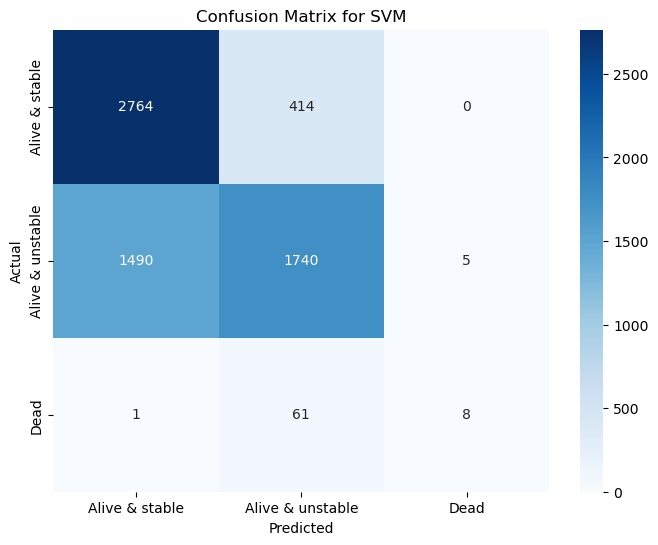

In [75]:


# Function to evaluate models on the test set
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the metrics
    print(f"Performance of {model_name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



# Evaluate Decision Tree
evaluate_model(best_dt_model, X_test, y_test, "Decision Tree")

# Evaluate Random Forest
evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

# Evaluate XGBoost
evaluate_model(best_xgb_model, X_test, y_test, "XGBoost")

# Evaluate Support Vector Machine (SVM)
evaluate_model(best_svm_model, X_test, y_test, "SVM")


Logistic Regression Performance:
Accuracy: 0.6363
Precision: 0.6408
Recall: 0.6363
F1 Score: 0.6325
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67      3178
           1       0.67      0.56      0.61      3235
           2       0.61      0.20      0.30        70

    accuracy                           0.64      6483
   macro avg       0.63      0.49      0.52      6483
weighted avg       0.64      0.64      0.63      6483



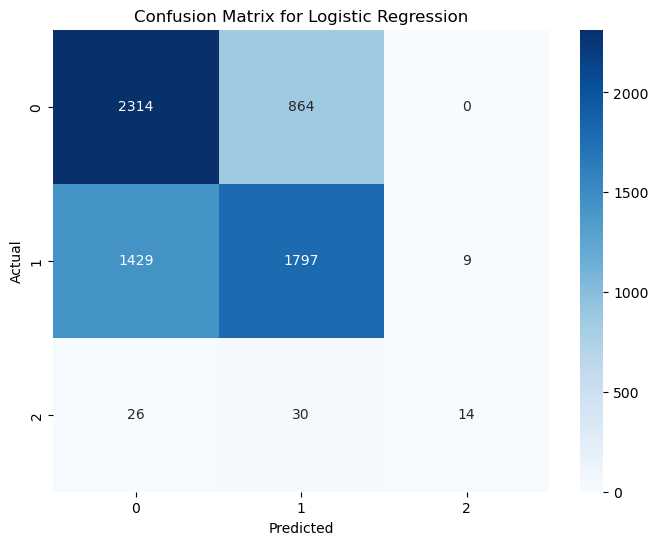

In [78]:




# Features and target definition
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn','InjuryType']

target = 'PatientStatus'

# Separate features and target variable for training, validation, and testing
X_train = sstandardized_train_df[features]
y_train = sstandardized_train_df[target]
X_valid = sstandardized_valid_df[features]
y_valid = sstandardized_valid_df[target]
X_test = sstandardized_test_df[features]
y_test = sstandardized_test_df[target]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter tuning with GridSearchCV (optional)
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']  # Solvers to try
}

logreg_grid_search = GridSearchCV(logreg_model, logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)

# Best Logistic Regression Model
best_logreg_model = logreg_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_logreg_model.classes_, yticklabels=best_logreg_model.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [80]:


# Data for the models' performance metrics
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "Support Vector Machine (SVM)", "Logistic Regression"],
    "Accuracy": [0.6961, 0.6742, 0.6947, 0.6960, 0.6363],
    "Precision": [0.7140, 0.6761, 0.7132, 0.7171, 0.6408],
    "Recall": [0.6961, 0.6742, 0.6947, 0.6960, 0.6363],
    "F1 Score": [0.6889, 0.6718, 0.6863, 0.6853, 0.6325]
}

# Create a DataFrame from the data
performance_df = pd.DataFrame(data)

# Display the comparison table
print(performance_df)


                          Model  Accuracy  Precision  Recall  F1 Score
0                 Decision Tree    0.6961     0.7140  0.6961    0.6889
1                 Random Forest    0.6742     0.6761  0.6742    0.6718
2                       XGBoost    0.6947     0.7132  0.6947    0.6863
3  Support Vector Machine (SVM)    0.6960     0.7171  0.6960    0.6853
4           Logistic Regression    0.6363     0.6408  0.6363    0.6325


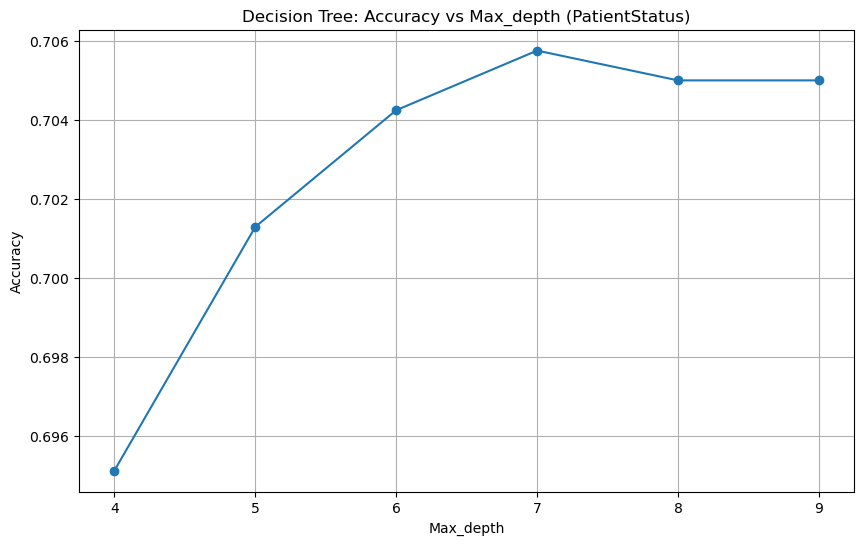

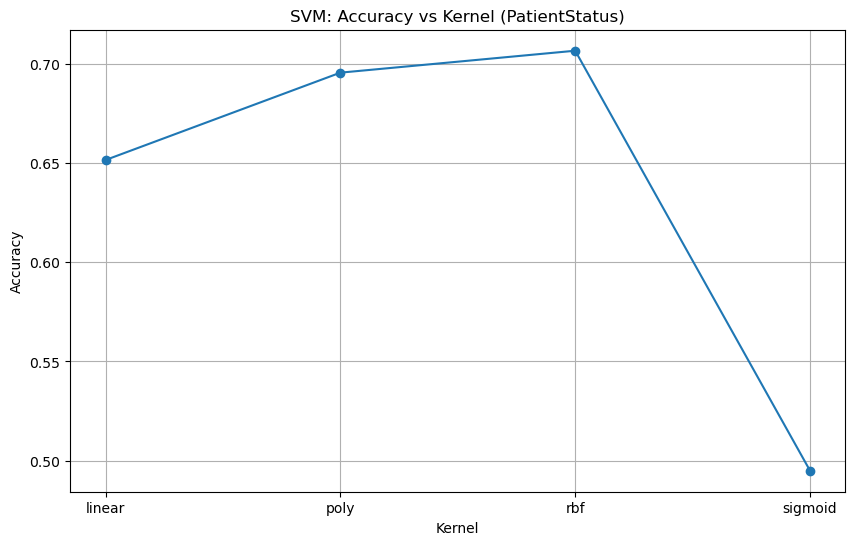

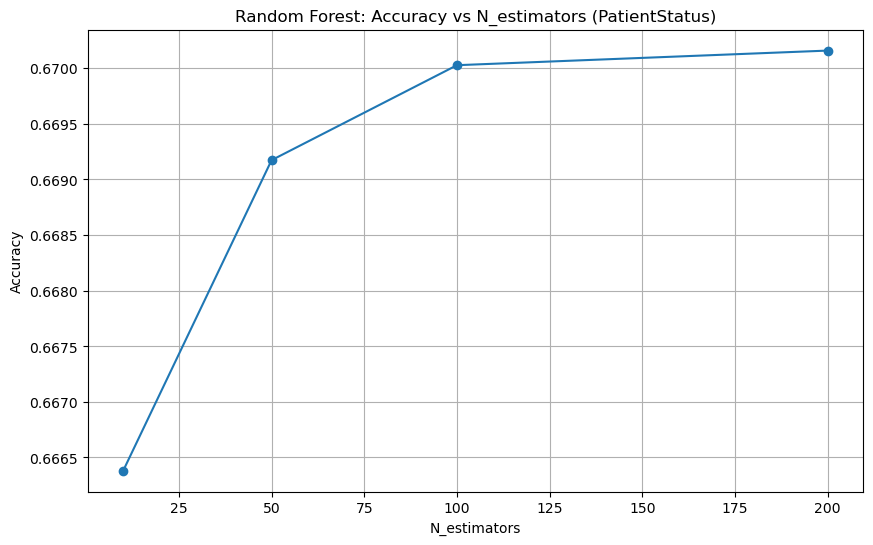

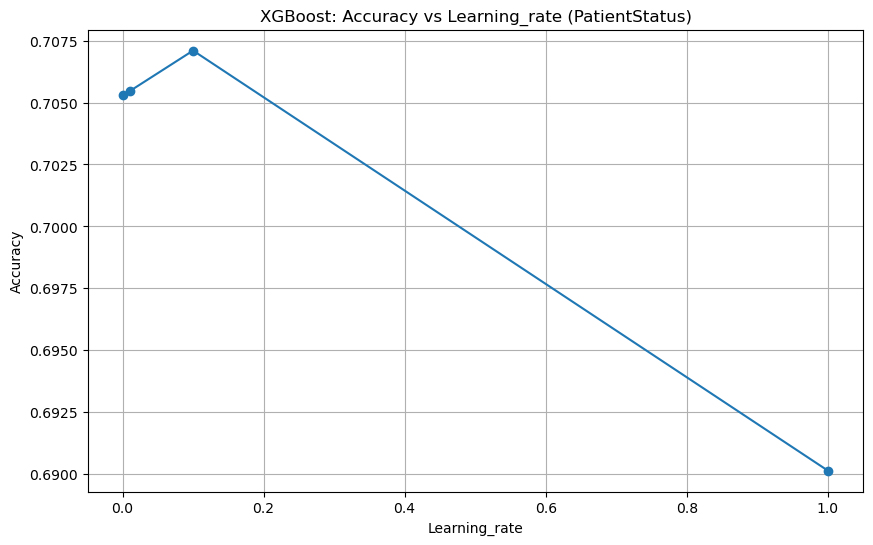

Performance on Test Set (PatientStatus):
Decision Tree - Accuracy: 0.696128335647077 Precision: 0.7140143265076313 Recall: 0.696128335647077 F1 Score: 0.6888584576668169
SVM - Accuracy: 0.6959740860712633 Precision: 0.7170652446244451 Recall: 0.6959740860712633 F1 Score: 0.6852779975958533
Random Forest - Accuracy: 0.6742248958815363 Precision: 0.6760782270568045 Recall: 0.6742248958815363 F1 Score: 0.6718025922131213
XGBoost - Accuracy: 0.694740089464754 Precision: 0.7131728353313254 Recall: 0.694740089464754 F1 Score: 0.6863037809548816
Confusion Matrix for Decision Tree (PatientStatus):
 [[2702  476    0]
 [1439 1782   14]
 [   1   40   29]]
Confusion Matrix for SVM (PatientStatus):
 [[2764  414    0]
 [1490 1740    5]
 [   1   61    8]]
Confusion Matrix for Random Forest (PatientStatus):
 [[2375  802    1]
 [1241 1978   16]
 [   1   51   18]]
Confusion Matrix for XGBoost (PatientStatus):
 [[2722  456    0]
 [1458 1763   14]
 [   2   49   19]]


In [82]:


# Define the features and target for PatientStatus
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn','InjuryType']
target = 'PatientStatus'  

# Assuming standardized_train_df, standardized_valid_df, standardized_test_df are already loaded
X_train = sstandardized_train_df[features]
y_train = sstandardized_train_df[target]
X_valid = sstandardized_valid_df[features]
y_valid = sstandardized_valid_df[target]
X_test = sstandardized_test_df[features]
y_test = sstandardized_test_df[target]

# Decision Tree: Accuracy vs Max_depth
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {'max_depth': [4, 5, 6, 7, 8, 9]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

# Plotting Decision Tree: Accuracy vs Max_depth for PatientStatus
dt_accuracies = dt_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(dt_param_grid['max_depth'], dt_accuracies, marker='o')
plt.title('Decision Tree: Accuracy vs Max_depth (PatientStatus)')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# SVM: Accuracy vs Kernel
svm_model = SVC(random_state=42)
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Plotting SVM: Accuracy vs Kernel for PatientStatus
svm_accuracies = svm_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(svm_param_grid['kernel'], svm_accuracies, marker='o')
plt.title('SVM: Accuracy vs Kernel (PatientStatus)')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Random Forest: Accuracy vs N_estimators
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [10, 50, 100, 200]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Plotting Random Forest: Accuracy vs N_estimators for PatientStatus
rf_accuracies = rf_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(rf_param_grid['n_estimators'], rf_accuracies, marker='o')
plt.title('Random Forest: Accuracy vs N_estimators (PatientStatus)')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# XGBoost: Accuracy vs Learning_rate
xgb_model = XGBClassifier(random_state=42)
xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Plotting XGBoost: Accuracy vs Learning_rate for PatientStatus
xgb_accuracies = xgb_grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(xgb_param_grid['learning_rate'], xgb_accuracies, marker='o')
plt.title('XGBoost: Accuracy vs Learning_rate (PatientStatus)')
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# After hyperparameter tuning, let's evaluate the models on the test set for PatientStatus

# Decision Tree
dt_best_model = dt_grid_search.best_estimator_
dt_test_pred = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred, average='weighted')
dt_recall = recall_score(y_test, dt_test_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_test_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_test_pred)

# SVM
svm_best_model = svm_grid_search.best_estimator_
svm_test_pred = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_test_pred)
svm_precision = precision_score(y_test, svm_test_pred, average='weighted')
svm_recall = recall_score(y_test, svm_test_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_test_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_test_pred)

# Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_test_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='weighted')
rf_recall = recall_score(y_test, rf_test_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_test_pred)

# XGBoost
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_pred = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_precision = precision_score(y_test, xgb_test_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_test_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_test_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_test_pred)

# Print the evaluation results for each model for PatientStatus
print("Performance on Test Set (PatientStatus):")
print("Decision Tree - Accuracy:", dt_accuracy, "Precision:", dt_precision, "Recall:", dt_recall, "F1 Score:", dt_f1)
print("SVM - Accuracy:", svm_accuracy, "Precision:", svm_precision, "Recall:", svm_recall, "F1 Score:", svm_f1)
print("Random Forest - Accuracy:", rf_accuracy, "Precision:", rf_precision, "Recall:", rf_recall, "F1 Score:", rf_f1)
print("XGBoost - Accuracy:", xgb_accuracy, "Precision:", xgb_precision, "Recall:", xgb_recall, "F1 Score:", xgb_f1)

# Optionally, you can also print confusion matrices if needed
print("Confusion Matrix for Decision Tree (PatientStatus):\n", dt_conf_matrix)
print("Confusion Matrix for SVM (PatientStatus):\n", svm_conf_matrix)
print("Confusion Matrix for Random Forest (PatientStatus):\n", rf_conf_matrix)
print("Confusion Matrix for XGBoost (PatientStatus):\n", xgb_conf_matrix)


# Phase 4
# Applying ANN on training set for PatientStatus

In [115]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Define features and target column
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn','InjuryType']
target = 'PatientStatus'

# Initialize LabelEncoder for target variable
label_encoder = LabelEncoder()

# Encode the target variable
sstandardized_train_df[target] = label_encoder.fit_transform(sstandardized_train_df[target])
sstandardized_valid_df[target] = label_encoder.transform(sstandardized_valid_df[target])
sstandardized_test_df[target] = label_encoder.transform(sstandardized_test_df[target])

# Separate features and target
X_train = sstandardized_train_df[features]
y_train = sstandardized_train_df[target]
X_valid = sstandardized_valid_df[features]
y_valid = sstandardized_valid_df[target]
X_test = sstandardized_test_df[features]
y_test = sstandardized_test_df[target]

# One-hot encode the target variable for the ANN
y_train_oh = pd.get_dummies(y_train).values
y_valid_oh = pd.get_dummies(y_valid).values
y_test_oh = pd.get_dummies(y_test).values

# Get the number of output classes
num_classes = y_train_oh.shape[1]

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_oh,
                    validation_data=(X_valid, y_valid_oh),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate the model on the test data
y_test_pred_oh = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_oh, axis=1)

# Print performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")




Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.6582 - loss: 0.6693 - val_accuracy: 0.6896 - val_loss: 0.6039
Epoch 2/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7062 - loss: 0.5893 - val_accuracy: 0.6991 - val_loss: 0.5928
Epoch 3/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7097 - loss: 0.5796 - val_accuracy: 0.6955 - val_loss: 0.5905
Epoch 4/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.7073 - loss: 0.5807 - val_accuracy: 0.6968 - val_loss: 0.5898
Epoch 5/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7101 - loss: 0.5788 - val_accuracy: 0.6924 - val_loss: 0.5959
Epoch 6/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.7099 - loss: 0.5727 - val_accuracy: 0.6988 - val_loss: 0.5875
Epoch 7/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.7069 - loss: 0.5762 - val_accuracy: 0.6994 - val_loss: 0.5891
Epoch 8/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.7121 - loss: 0.5754 - val_accurac

# Evaluating the performance of the trained models on the test set using :
# Accuracy
# Precision
# F1 Score
# Recall
# Confusion Matrix

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
Accuracy: 0.6958
Precision: 0.7107
Recall: 0.6958
F1 Score: 0.6894
Confusion Matrix:
[[2668  510    0]
 [1404 1817   14]
 [   1   43   26]]


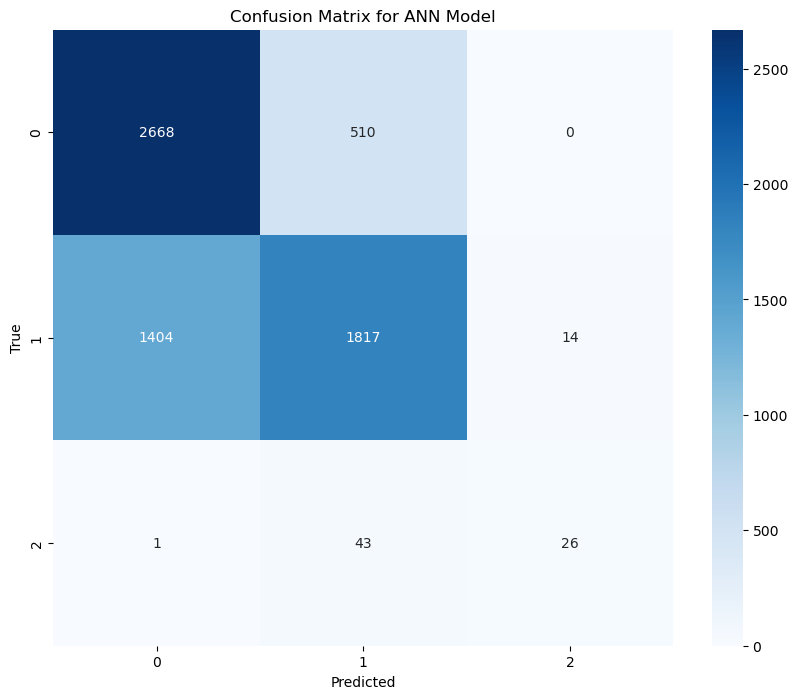

In [117]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted', zero_division=0)
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for ANN Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



# Comparison table and Algorithms' performance for PatientStatus

In [119]:
# Create a dictionary with performance metrics for each model
model_performance = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "Support Vector Machine (SVM)", "Logistic Regression","ANN"],
    "Accuracy": [0.6961, 0.6742, 0.6947, 0.6960, 0.6363,0.6958 ],
    "Precision": [0.7140, 0.6761, 0.7132, 0.7171, 0.6408,0.7107],
    "Recall": [0.6961, 0.6742, 0.6947, 0.6960, 0.6363,0.6958],
    "F1 Score": [0.6889, 0.6718, 0.6863, 0.6853, 0.6325,0.6894]
}

# Convert the dictionary into a pandas DataFrame
comparison_df = pd.DataFrame(model_performance)

# Display the comparison table
print(comparison_df)

# Optionally save the table to a CSV file
comparison_df.to_csv("model_comparison.csv", index=False)


                          Model  Accuracy  Precision  Recall  F1 Score
0                 Decision Tree    0.6961     0.7140  0.6961    0.6889
1                 Random Forest    0.6742     0.6761  0.6742    0.6718
2                       XGBoost    0.6947     0.7132  0.6947    0.6863
3  Support Vector Machine (SVM)    0.6960     0.7171  0.6960    0.6853
4           Logistic Regression    0.6363     0.6408  0.6363    0.6325
5                           ANN    0.6958     0.7107  0.6958    0.6894


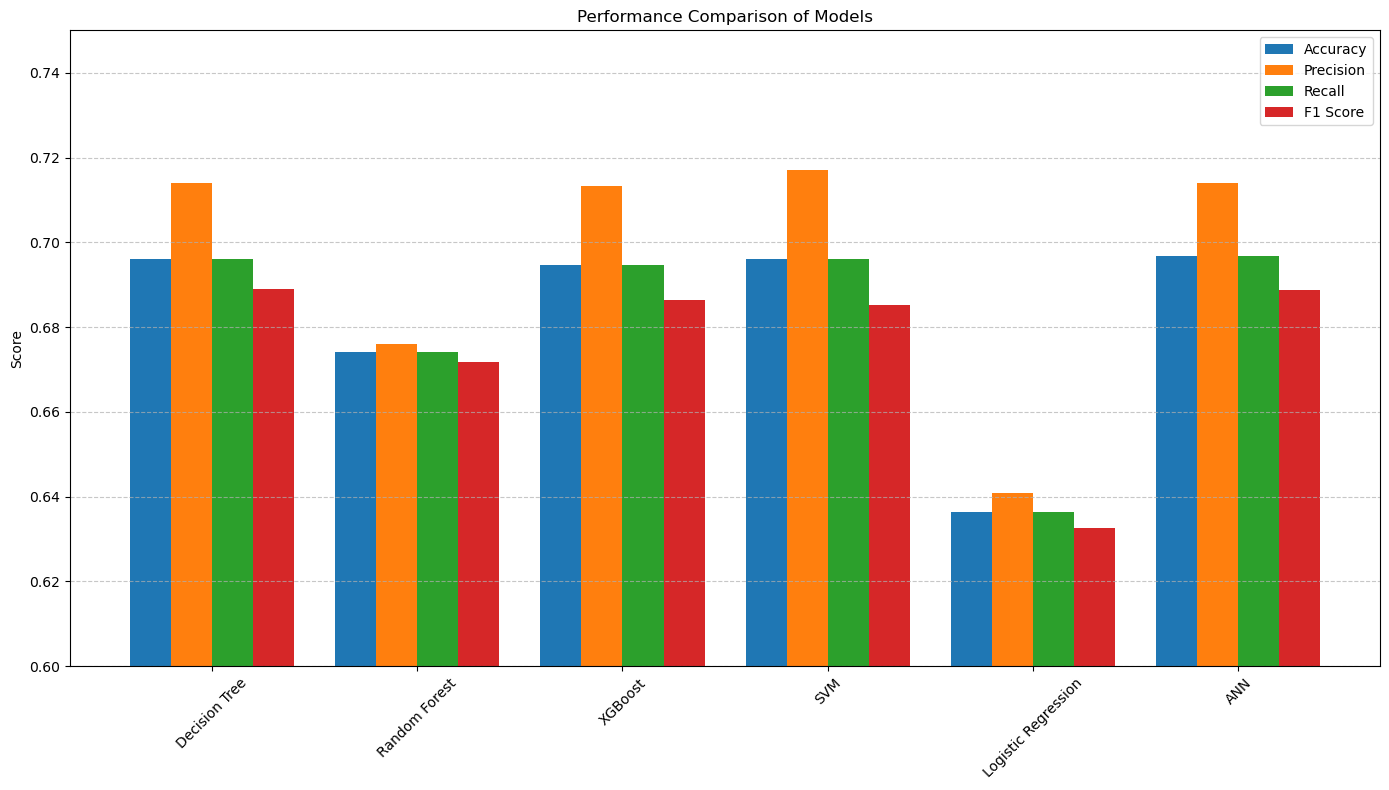

In [121]:
# Data: Updated performance metrics
models = ["Decision Tree", "Random Forest", "XGBoost", "SVM", "Logistic Regression", "ANN"]
accuracy = [0.6961, 0.6742, 0.6947, 0.6960, 0.6363, 0.6967]
precision = [0.7140, 0.6761, 0.7132, 0.7171, 0.6408, 0.7139]
recall = [0.6961, 0.6742, 0.6947, 0.6960, 0.6363, 0.6967]
f1_score = [0.6889, 0.6718, 0.6863, 0.6853, 0.6325, 0.6888]

# Setting up bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Create subplots for each metric
plt.figure(figsize=(14, 8))

# Accuracy Plot
plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, label="Accuracy")

# Precision Plot
plt.bar(x - 0.5 * bar_width, precision, width=bar_width, label="Precision")

# Recall Plot
plt.bar(x + 0.5 * bar_width, recall, width=bar_width, label="Recall")

# F1 Score Plot
plt.bar(x + 1.5 * bar_width, f1_score, width=bar_width, label="F1 Score")

# Adding labels, title, and legend
plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.ylim(0.6, 0.75)  
plt.title("Performance Comparison of Models")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()3


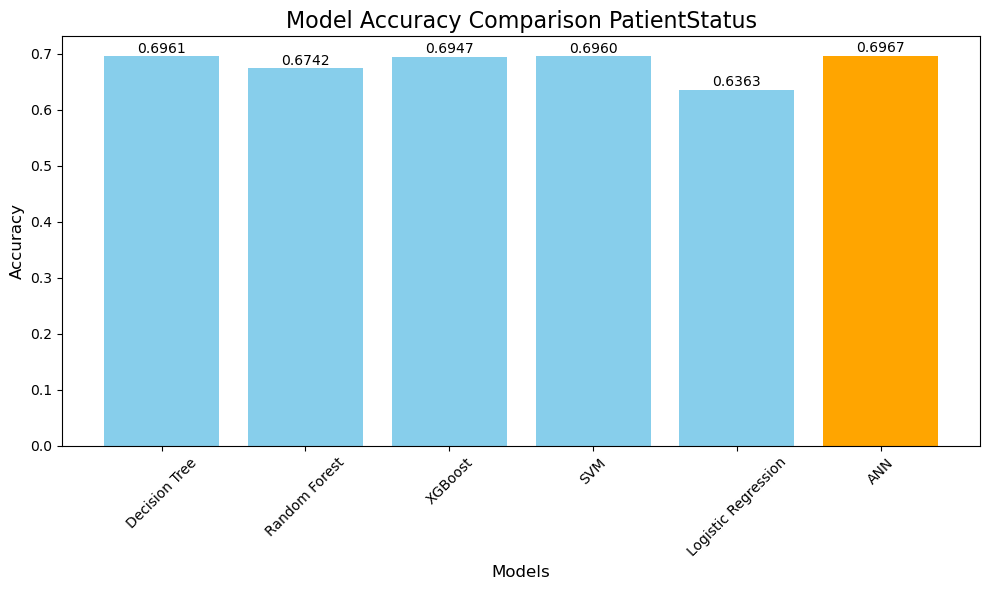

In [147]:
# Data
models = ["Decision Tree", "Random Forest", "XGBoost", "SVM", "Logistic Regression", "ANN"]
accuracy = [0.6961, 0.6742, 0.6947, 0.6960, 0.6363, 0.6967]

# Identify the model with the highest accuracy
max_accuracy = max(accuracy)
max_accuracy_index = accuracy.index(max_accuracy)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')

# Highlight the highest accuracy model
plt.bar(models[max_accuracy_index], accuracy[max_accuracy_index], color='orange')

# Add the accuracy values as labels on top of the bars
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.001, f'{accuracy[i]:.4f}', ha='center', va='bottom')

# Add title and labels
plt.title("Model Accuracy Comparison PatientStatus", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Applying ANN on training set for InjuryType

In [125]:
# Define features and target column for InjuryType
features = ['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 
            'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
            'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 
            'OthersInvolved', 'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others', 
            'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn']
target = 'InjuryType'

# Initialize LabelEncoder for target variable
label_encoder = LabelEncoder()

# Encode the target variable
standardized_train_df[target] = label_encoder.fit_transform(standardized_train_df[target])
standardized_valid_df[target] = label_encoder.transform(standardized_valid_df[target])
standardized_test_df[target] = label_encoder.transform(standardized_test_df[target])

# Separate features and target
X_train = standardized_train_df[features]
y_train = standardized_train_df[target]
X_valid = standardized_valid_df[features]
y_valid = standardized_valid_df[target]
X_test = standardized_test_df[features]
y_test = standardized_test_df[target]

# One-hot encode the target variable for the ANN
y_train_oh = pd.get_dummies(y_train).values
y_valid_oh = pd.get_dummies(y_valid).values
y_test_oh = pd.get_dummies(y_test).values

# Get the number of output classes
num_classes = y_train_oh.shape[1]

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_oh,
                    validation_data=(X_valid, y_valid_oh),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate the model on the test data
y_test_pred_oh = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_oh, axis=1)

# Print performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")



Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.7507 - loss: 0.8351 - val_accuracy: 0.7631 - val_loss: 0.7693
Epoch 2/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7642 - loss: 0.7657 - val_accuracy: 0.7631 - val_loss: 0.7658
Epoch 3/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7607 - loss: 0.7690 - val_accuracy: 0.7637 - val_loss: 0.7676
Epoch 4/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.7622 - loss: 0.7636 - val_accuracy: 0.7637 - val_loss: 0.7690
Epoch 5/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7636 - loss: 0.7603 - val_accuracy: 0.7637 - val_loss: 0.7653
Epoch 6/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7615 - loss: 0.7620 - val_accuracy: 0.7639 - val_loss: 0.7638
Epoch 7/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7641 - loss: 0.7579 - val_accuracy: 0.7637 - val_loss: 0.7700
Epoch 8/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7664 - loss: 0.7494 - val_accurac

# Evaluating the performance (InjuryType) of the trained models on the test set using :
# Accuracy
# Precision
# F1 Score
# Recall
# Confusion Matrix

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
Test Accuracy: 0.7646
Precision: 0.6248
Recall: 0.7646
F1 Score: 0.6648
Confusion Matrix:
[[   2  435    0    0    0]
 [   2 4953    1    6    0]
 [   4  104    1    2    0]
 [   0  910    1    1    0]
 [   0   61    0    0    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


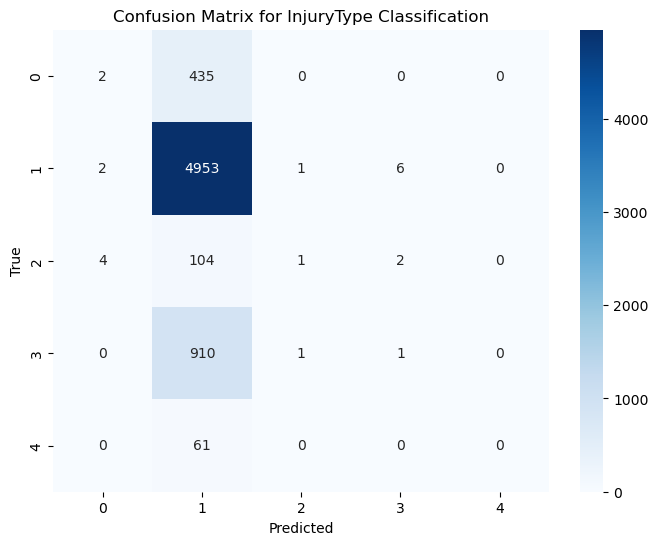

In [129]:
# Predict using the trained model
y_test_pred_oh = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_oh, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1 score for each class (using weighted average)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for InjuryType Classification")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Comparison table and Algorithms' performance for InjuryType

In [133]:


model_performance = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "ANN","SVM"],
    "Accuracy": [0.7657, 0.7655, 0.7270, 0.7651,0.7646,0.7656],
    "Precision": [0.6119, 0.5998, 0.6241, 0.6564,0.6248,0.6088],
    "Recall": [0.7657, 0.7655, 0.7270, 0.7651,0.7646,0.7656],
    "F1 Score": [0.6650, 0.6643, 0.6640, 0.6650,0.6648,0.6646],
}

# Convert the dictionary into a pandas DataFrame
comparison_df = pd.DataFrame(model_performance)

# Display the comparison table
print(comparison_df)

# Optionally save the table to a CSV file
comparison_df.to_csv("model_comparison.csv", index=False)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7657     0.6119  0.7657    0.6650
1        Decision Tree    0.7655     0.5998  0.7655    0.6643
2        Random Forest    0.7270     0.6241  0.7270    0.6640
3              XGBoost    0.7651     0.6564  0.7651    0.6650
4                  ANN    0.7646     0.6248  0.7646    0.6648
5                  SVM    0.7656     0.6088  0.7656    0.6646


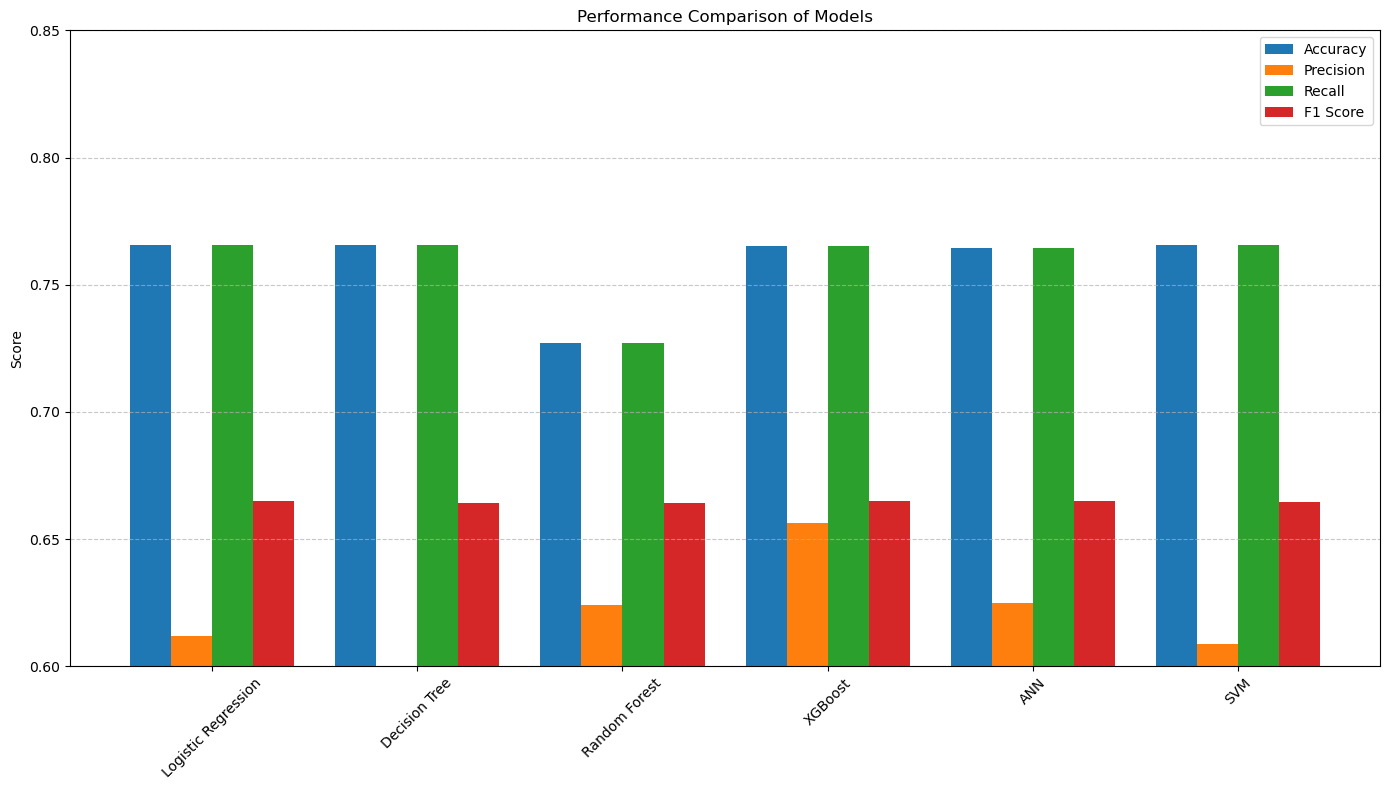

In [137]:

# Data: Updated performance metrics
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "ANN","SVM"]
accuracy = [0.7657, 0.7655, 0.7270, 0.7651,0.7646,0.7656]
precision = [0.6119, 0.5998, 0.6241, 0.6564,0.6248,0.6088]
recall = [0.7657, 0.7655, 0.7270, 0.7651,0.7646,0.7656]
f1_score = [0.6650, 0.6643, 0.6640, 0.6650,0.6648,0.6646]

# Setting up bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Create subplots for each metric
plt.figure(figsize=(14, 8))

# Accuracy Plot
plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, label="Accuracy")

# Precision Plot
plt.bar(x - 0.5 * bar_width, precision, width=bar_width, label="Precision")

# Recall Plot
plt.bar(x + 0.5 * bar_width, recall, width=bar_width, label="Recall")

# F1 Score Plot
plt.bar(x + 1.5 * bar_width, f1_score, width=bar_width, label="F1 Score")

# Adding labels, title, and legend
plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.ylim(0.6, 0.85)  # Set limits to emphasize differences
plt.title("Performance Comparison of Models")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


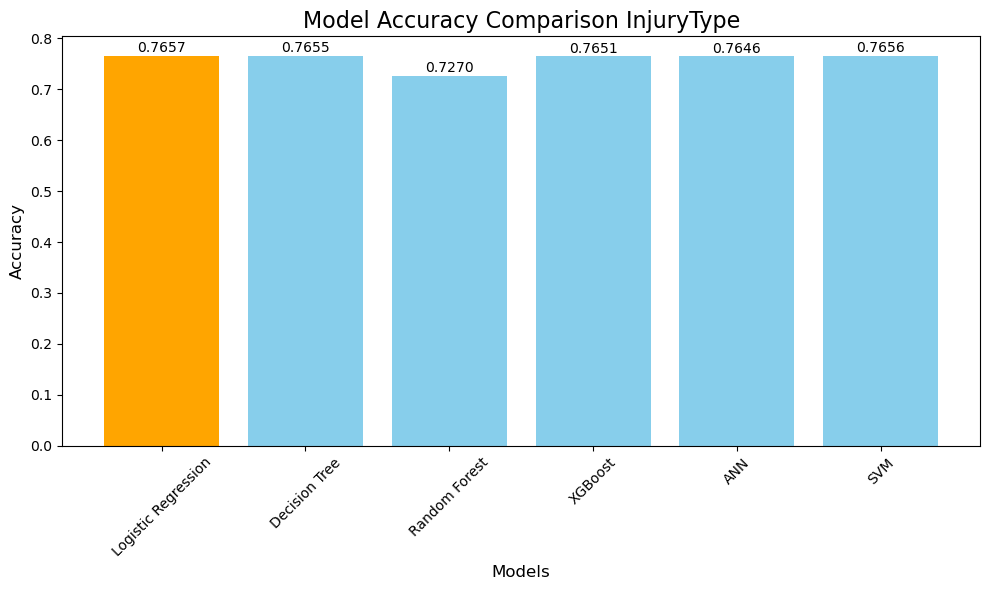

In [145]:

# Data
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "ANN", "SVM"]
accuracy = [0.7657, 0.7655, 0.7270, 0.7651, 0.7646, 0.7656]

# Identify the model with the highest accuracy
max_accuracy = max(accuracy)
max_accuracy_index = accuracy.index(max_accuracy)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')

# Highlight the highest accuracy model
plt.bar(models[max_accuracy_index], accuracy[max_accuracy_index], color='orange')

# Add the accuracy values as labels on top of the bars
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.001, f'{accuracy[i]:.4f}', ha='center', va='bottom')

# Add title and labels
plt.title("Model Accuracy Comparison InjuryType", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
